# (DEMO) Report for ICCS240: DBMS class project: SNPDB
*Group Members*: Kriangsak T., Hasdin,G.
This report refers to this attached repository : [SNPBD](https://github.com/Kriangsak1997/DatabaseClassProject)


### Please treat this to be a small demo...
First of all, we used docker to run out protgresql database: used commands can be found in the file named "command_involvingDockerandPSQL.txt". 
In this file, you will find what is used to map data to the container.... since i have no time (more like brain) to build a proper image for it.... Please see the following

In [6]:
# filepath  = '/Users/kriangsak1997/Documents/MUIC/Term8/DBMS/Project/command_involvingDockerandPSQL.txt'
# with open(filepath) as fp:
#    line = fp.readline()
#    cnt = 1
#    while line:
#        print("Line {}: {}".format(cnt, line.strip()))
#        line = fp.readline()
#        cnt += 1

# Connect to the Database
After having created the database and import the file into it, we will connect to the database using Java. 
Here with help of **Maven** dependencies, it allows to very easily connect to our database, we can dp so by
creating a Maven project.
Then access the file: *pom.xml* <br>
and we add the dependencies: <br>
> </dependency/> 
>>         </groupId/> org.postgresql</groupId/> 
>>          </artifactId/>postgresql</artifactId/> 
>>          </version/>42.2.10</version/> 
> </dependency/> 
<br> 

# What is SNP?
 Here, please let me introtduce you with our schema. In case you have not heard of Single Nucleotide Polymorphisms (SNPs). <br>
**Single nucleotide polymorphisms**, frequently called SNPs (pronounced “snips”), are the most common type of genetic variation among people. Each SNP represents a difference in a single DNA building block, called a nucleotide. For example, a SNP may replace the nucleotide cytosine (C) with the nucleotide thymine (T) in a certain stretch of DNA. <br>

*SNPs* occur normally throughout a person’s DNA. They occur almost once in every 1,000 nucleotides on average, which means there are roughly 4 to 5 million SNPs in a person's genome. These variations may be unique or occur in many individuals; scientists have found more than 100 million SNPs in populations around the world. Most commonly, these variations are found in the DNA between genes. They can act as biological markers, helping scientists locate genes that are associated with disease. When SNPs occur within a gene or in a regulatory region near a gene, they may play a more direct role in disease by affecting the gene’s function.

Most SNPs have no effect on health or development. Some of these genetic differences, however, have proven to be very important in the study of human health. Researchers have found SNPs that may help predict an individual’s response to certain drugs, susceptibility to environmental factors such as toxins, and risk of developing particular diseases. SNPs can also be used to track the inheritance of disease genes within families. Future studies will work to identify SNPs associated with complex diseases such as heart disease, diabetes, and cancer.
[source](https://ghr.nlm.nih.gov/primer/genomicresearch/snp)

# Schema Detail
We have created the following schema:
Note that before inserting the data into our database, we needed to do a bit of porcessing to extract our data out from the origal input data, [please refer to](https://github.com/Kriangsak1997/DatabaseClassProject/blob/master/notebooks/processing.ipynb)

**SNP_DB**(Main_Gene_name  varchar, initialAA varchar,finalAA varchar,position_of_Change varchar,Type_of_Variant varchar,dbSNP varchar,Disease_name varchar)

That is, 
 >  *Main_Gene_name*  contains the name of the gene for each record, taking *strings* of gene names <br>
 
 > *initialAA* contains the amino acid (AA) abbreviation before a change occurs , taking *strings* of AA ,br>
 
 > *finalAA* contains the amino acid (AA) abbreviation after a change occurs , taking *strings* of AA <br>
 
 > *position_of_Change* contains the position of AA (in the change of AA chains of a gene), taking **string** of position, which later will be altered to integer type <br>
 
 > *Type_of_Variant* contains the type of variants for which an SNP causes, taking *strings* of variant types <br>
 
 > *dbSNP* take takes in database code used to access more information regarding a change in NCBI SNP database, taking strings of DB-code <br>
 
 > *Disease_name* contains the name of diseases, if applicable, caused by SNPs, taking *strings* of disease names.
  

### Abbreviations and Full names
The following dataframe displays to you the full AA names corresponding to abbreviations used in our database

In [7]:
AminoAcid_name =pd.read_csv('/Users/kriangsak1997/Documents/MUIC/Term8/DBMS/Project/aanames.csv')
AminoAcid_name 

,Abbreviation,Ful name
0,Ala,Alanine
1,Arg,Arginine
2,Asn,Asparagine
3,Asp,Aspartic acid (Aspartate)
4,Cys,Cysteine
5,Gln,Glutamine
6,Glu,Glutamic acid (Glutamate)
7,Gly,Glycine
8,His,Histidine
9,Ile,Isoleucine



## Now we can query from out database for all: CRUD queries
From this, we take a data-analytic approach to our database. That is, we will apply a small mining algorithm on the given dataset. 

# Associative Rule Mining with Apriori Algorithm
for those wishing to understand more about this concept, [consult](https://blog.usejournal.com/association-rule-mining-apriori-algorithm-c517f8d7c54c)
There are a few things to introduce for those new to Associative Rule Mining or, perhaps also, Apriori Algorithm. 
<br>
the results of out experiments is in the file: notebooks/Association Rule Mining with Apriori algorithm.ipynb
with a few tials of different hyperparemeters (supports, Confidence). It turns out that the with conditional probabiity of 25%, this gives out 3 frequent item set( of 2 elements): <br>

**('Asp', 'Asn'), ('Tyr', 'Cys'), ('Glu', 'Lys')** 

This will be examined later in this demo.

In addition to the first submission, there is a need for a moer thorough anaysis of the data. To do so, the problem that was not fixed, purposely actually ^^, is that we need to convert the type of attibute **position_of_change** into an **integer** type. It is very simple to do so, we can simply run the following command to our datbase. <br>

> **ALTER TABLE** snp_db **ALTER COLUMN** position_of_change **TYPE INT USING** position_of_change::integer; <br>

From here on, we can do analysis associated with position of chnages and our obtained frequent itemsets obtained from associative rule mining. For simplicity, let's bring in a few functions which will later be used in this demo.

In [6]:
import psycopg2
import pandas as pd
import numpy as np 
from apyori import apriori
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
"""
This connection function will acts as a connection factory as it is in our ConnectionFactory.java 
in this repository.
"""
def connection(user,pwd,host,port,db):
    try:
       connection = psycopg2.connect(user=user,
                                  password=pwd,
                                  host=host,
                                  port=port,
                                  database=db)
       cursor = connection.cursor()
       return cursor
    except (Exception, psycopg2.Error) as error :
        print ("Error while fetching data from PostgreSQL", error)

"""
this select class will return the output from input queries and return, for the moment, as a numpy array object.
"""
user ="postgres"
pwd = "1997"
host ="localhost"
port = "5432"
db= "postgres"
def select(q):
    c = connection(user,pwd,host,port,db)
    c.execute(q)
    arr = np.array(c.fetchall()) 
    return arr

In [51]:
snp =pd.DataFrame(select("select initialAA,finalAA from snp_db"))
snp.columns=[ 'initialAA', 'finalAA']
snps = []
for row in range(0,len(snp)):
    snps.append([str(snp.values[row,j]) for j in range(0,2)])
association_rules = apriori(snps,min_support=0.0093,min_confidence=0.250,min_lift =3,min_length=2)
association_results =list(association_rules)
finals = []
rows = []
for item in association_results:                                          
#     to display the rule, the support, the confidence, and lift for each rule in a more clear way:

    # first index of the inner list
    # Contains base item and add item
    eachrow=[]
    pair = item[0] 
    items = [x for x in pair]
#     print("Rule: " + items[0] + " -> " + items[1])
    eachrow.append(items[0] + " -> " + items[1])

    #second index of the inner list
#     print("Support: " + str(item[1]))
    eachrow.append(item[1])

    #third index of the list located at 0th
    #of the third index of the inner list

#     print("Confidence: " + str(item[2][0][2]))
    eachrow.append(item[2][0][2])
#     print("Lift: " + str(item[2][0][3]))
    eachrow.append(item[2][0][3])
    rows.append(eachrow)
#     print("=====================================")
miningresults = pd.DataFrame(rows)
cols = ["rule", "Support", "Confidence", "Lift"]
miningresults.columns = cols

In [55]:
miningresults
# miningresults.to_csv(r'/Users/kriangsak1997/Documents/MUIC/Term8/DBMS/Project/miningResults.csv', index = False)

,rule,Support,Confidence,Lift
0,Asn -> Asp,0.020755,0.283619,3.397908
1,Tyr -> Cys,0.021931,0.254751,4.943691
2,Lys -> Glu,0.031555,0.369445,5.063446


*Note that we have added the result into the 8th case of our switch case class so that the user can see this obtained result*

# What can see learn from the following rules
we shall try to zoom in into each of an associative frequent itemsets and see what can be drawn from it. For example, we can ask the following questions.
> (1) What type of variants are caused by the obtained rules. <br>
> (2) What are are the positions of change when we specify with obtained initial and final AAs. we can bin this, say, into 3 subintervals. From this quetion, we can deepen the quetion into: once binneed into 3 subintervals, which subinterval containes the largest number of changes recorded  <br>

## (1) What type of variants are caused by the obtained rules

In [8]:
#Prepare the queries for the 3 rules
final_Queries = ["select count(main_gene_name) from snp_db where initialaa='Asp' and finalaa = 'Asn' group by type_of_variant;",
                "select count(main_gene_name) from snp_db where initialaa='Tyr' and finalaa = 'Cys' group by type_of_variant; ",
                 "select count(main_gene_name) from snp_db where initialaa='Glu' and finalaa = 'Lys' group by type_of_variant;"]
records= [select(final_Queries[i]).T.flatten().tolist() for i in range(3)]
framessss = pd.DataFrame(records)
framessss.insert(0,"Rule",["Asp -> Asn", "Tyr -> Cys", "Glu -> Lys"],True)
framessss.columns = ["Rule\Type of Variant","Disease","Polymorphism","Unclassified"] 
#note that pqsl return the count in alphabetical order. 
framessss.set_index(['Rule\Type of Variant'])

,Disease,Polymorphism,Unclassified
Rule\Type of Variant,,,
Asp -> Asn,457,592,147
Tyr -> Cys,574,285,80
Glu -> Lys,785,813,214


In [9]:
# framessss.to_csv(r'/Users/kriangsak1997/Documents/MUIC/Term8/DBMS/Project/frequent_thingy.csv', index = False)

In [10]:
# check = "select * from frequent_things"
# select(check)

Here we go, the above dataframe displays different types of variants based on the given associative rules. 
It is obvious to see that  2 out of 3 rules (Asp -> Asn,Glu -> Lys), when these changes occur, they give rise to polymorphism more than the other two types of genetic variations

## (2) Binning of positions of changes
like we said earilier, we would like to know What are are the positions of change when we specify with obtained initial and final AAs. we can bin this, say, into 3 subintervals. From this quetion, we can deepen the quetion into: once binneed into 3 subintervals, which subinterval containes the largest number of changes recorded. Here is the plans of what we are going to do in the next few cells <br>

> First, we want to bin the entire dataset <br>
> Second, we will do the same for each of the 3 obtained assiciative frequent itemset.<br>
> finally, we will compare the result accordingly.

### Binning the whole dataset


In [11]:
count_main, bin_main = np.histogram(select("select position_of_change from snp_db"),3)
# plt.hist(bins[:-1], bins, weights=counts)

In [12]:
intv= [11439.6, 22877.3,34315.0]
vals = count_main.flatten().tolist()
vals

[78023, 108, 114]

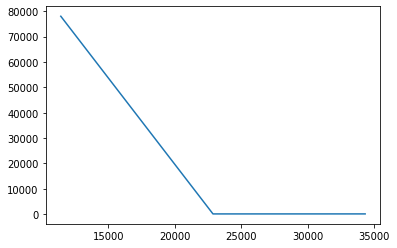

In [13]:
plot_main = plt.plot(intv,vals)


### Binning the case when Asp changes into Asn

(array([1192,    1,    3]),
 array([2.00000000e+00, 7.95866667e+03, 1.59153333e+04, 2.38720000e+04]))

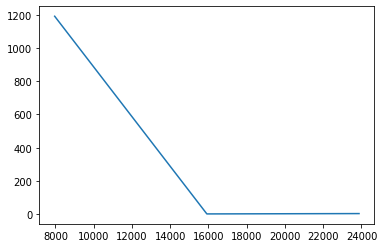

In [14]:
count_1, bins_1 = np.histogram(select("select position_of_change from snp_db where initialaa='Asp' and finalaa = 'Asn'"),3)
plt.plot(bins_1.flatten().tolist()[1:],count_1.flatten().tolist())
count_1,bins_1

### Binning the case when Tyr  changes into Cys

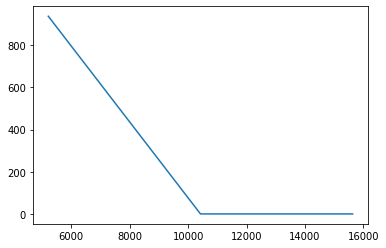

In [59]:
count_2, bins_2 = np.histogram(select("select position_of_change from snp_db where initialaa='Tyr' and finalaa = 'Cys'"),3)
plt.plot(bins_2.flatten().tolist()[1:],count_2.flatten().tolist())
count_2,bins_2
from IPython.display import Image 

### Binning the case when Glu  changes into Lys 

(array([1805,    3,    4]),
 array([2.00000000e+00, 1.12066667e+04, 2.24113333e+04, 3.36160000e+04]))

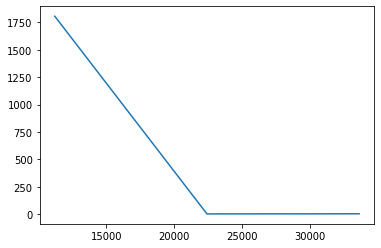

In [16]:
count_3, bins_3 = np.histogram(select("select position_of_change from snp_db where initialaa='Glu' and finalaa = 'Lys'"),3)
plt3 =plt.plot(bins_3.flatten().tolist()[1:],count_3.flatten().tolist())
count_3,bins_3

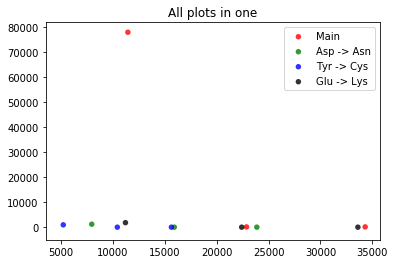

In [17]:

colors = (0,0,0)
area = np.pi*3

# Plot

g1 = (bin_main.flatten().tolist()[1:], count_main.flatten().tolist())
g2 = (bins_1.flatten().tolist()[1:], count_1.flatten().tolist())
g3 = (bins_2.flatten().tolist()[1:], count_2.flatten().tolist())
g4 = (bins_3.flatten().tolist()[1:], count_3.flatten().tolist())
data = (g1, g2, g3,g4)
colors = ("red", "green", "blue","black")
groups = (["Main","Asp -> Asn", "Tyr -> Cys", "Glu -> Lys"])

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for data, color, group in zip(data, colors, groups):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

plt.title('All plots in one')
plt.legend(loc=0)
plt.show()

Plotting with the main dataset makes it hard to see the actual trend for the subplots: all the frequent iremsets.

We will try to construct a new plot excluding the main dataset


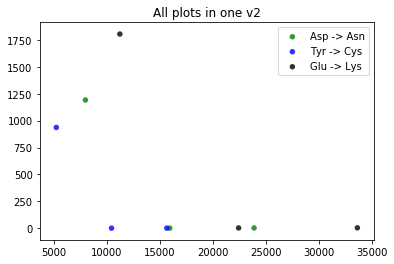

In [18]:

colors = (0,0,0)
area = np.pi*3

# g1 = (bin_main.flatten().tolist()[1:], count_main.flatten().tolist())
g2 = (bins_1.flatten().tolist()[1:], count_1.flatten().tolist())
g3 = (bins_2.flatten().tolist()[1:], count_2.flatten().tolist())
g4 = (bins_3.flatten().tolist()[1:], count_3.flatten().tolist())
data = ( g2, g3,g4)
colors = ( "green", "blue","black")
groups = (["Asp -> Asn", "Tyr -> Cys", "Glu -> Lys"])

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for data, color, group in zip(data, colors, groups):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

plt.title('All plots in one v2')
plt.legend(loc=0)
plt.show()

from here we can see that the the most significant intervals are the first interval of every subplot. 

In addition to that, we can also try to check for which of the frequent itemset, which one has the most number of changes cross all subitervals

In [57]:
countsss = [count_1, count_2, count_3]
sumcol = [np.sum(count_1),np.sum(count_2),np.sum(count_3)]
countframes = pd.DataFrame(countsss)
countframes.columns= ["1st-inv'l","2nd-inv'l","3rd-inv'l"]
countframes
countframes.insert(0,"Rule",["Asp -> Asn", "Tyr -> Cys", "Glu -> Lys"],True)
countframes.insert(4,"total",sumcol,True)
countframes.columns = ["Rule\intvl","1st-inv'l","2nd-inv'l","3rd-inv'l","total"] 
#note that pqsl return the count in alphabetical order. 
countframes.set_index(['Rule\intvl'])
new = countframes
new

,Rule\intvl,1st-inv'l,2nd-inv'l,3rd-inv'l,total
0,Asp -> Asn,1192,1,3,1196
1,Tyr -> Cys,937,1,1,939
2,Glu -> Lys,1805,3,4,1812


As we can see from the summary table, when Asp changes into Asn, it has the largest number of changes. In fact, we also know this from the outout from our associative mining. That is, we can pinpoint this fact by looking at the conditional probabilities, confidence values.

In [56]:
# new.to_csv(r'/Users/kriangsak1997/Documents/MUIC/Term8/DBMS/Project/count_per_interval.csv', index = False)

# Put the rules aside
Apart from the ontained results, we can also pose a few quetions directly to our databse. Let's assume that there exists a curious user wanting to know the followig: <br>
+ what is the count the each amino acid in the database: initial and final counts: to see this please select case 11 ans 13.
+ what if the user wants to know more about a specific record, then go ahead with case 13: where the input parameter is taken from attribute "dbSNP". The user shall have a brower opening the NBCI page linked to the specified record.
Let's see how each of the switch cases works!!


### Case 1: Count polymorphism
this query return to the user: the total number of polymorphism cases in the database
![image](case1.png)

### Case 2: Count disease
this query return to the user: the total number of disease cases in the database
![image](case2.png)

### Case 3: Count unclassified
this query return to the user: the total number of unclassified cases in the database
![image](case3.png)

### Case 4: Classification, 
I know this is just the aggregation of case 1,2 and 3, but why not, let's just see it!
![image](case4.png)

### Case 5: Insert record
This case takes care of record insertion
![image](case5.png)

### Case 6: Create Table
This case takes care of creating a new table...it shows some sort of error, but it works.... I dont know how to fix this bug...admitedly. 
![image](case6.png)

### Case 7: Count_Subinterval
This case returns to the user the counts for each subintervals resulted from our Associative rule mining
![image](case7.png)

### Case 8: Display Mining Result
This case returns to you the result of our mining on the database: and yes I know it shuold have come before case 7....but whatever.
![image](case8.png)

### Case 9: Display Rule_ vs_Type_Of_variants
This case presents to the user, with three obtained associative frequent itemsets, the catagorizations of variants associated to each rule.
![image](case9.png)

### Case 10: others
This case allows users to query from the database
![image](case10.png)

### Case 11: final amino acids group by counts
This case counts the final amino acids 
![image](case11.png)

### Case 12: initial amino acids group by count
This case counts the initla amino acids: and again, this case should have been the 11th case, i guess....
![image](case12.png)

### Case 13: brow more information of a record of interest
This case allows rthe user to browse more information regarding the record of interest opening the brower with NCBI database page of the specified record.
![image](case13.png)

# End of Demonstration #
Thank you for you attention, please stay safe!

![image](coronavirus-meme.jpg)